In [1]:
!pip install tensorflow

In [2]:
!pip install keras

In [3]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [5]:
Alp = pd.read_csv("Alphabets_data.csv")
Alp.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
Alp.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
Alp.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


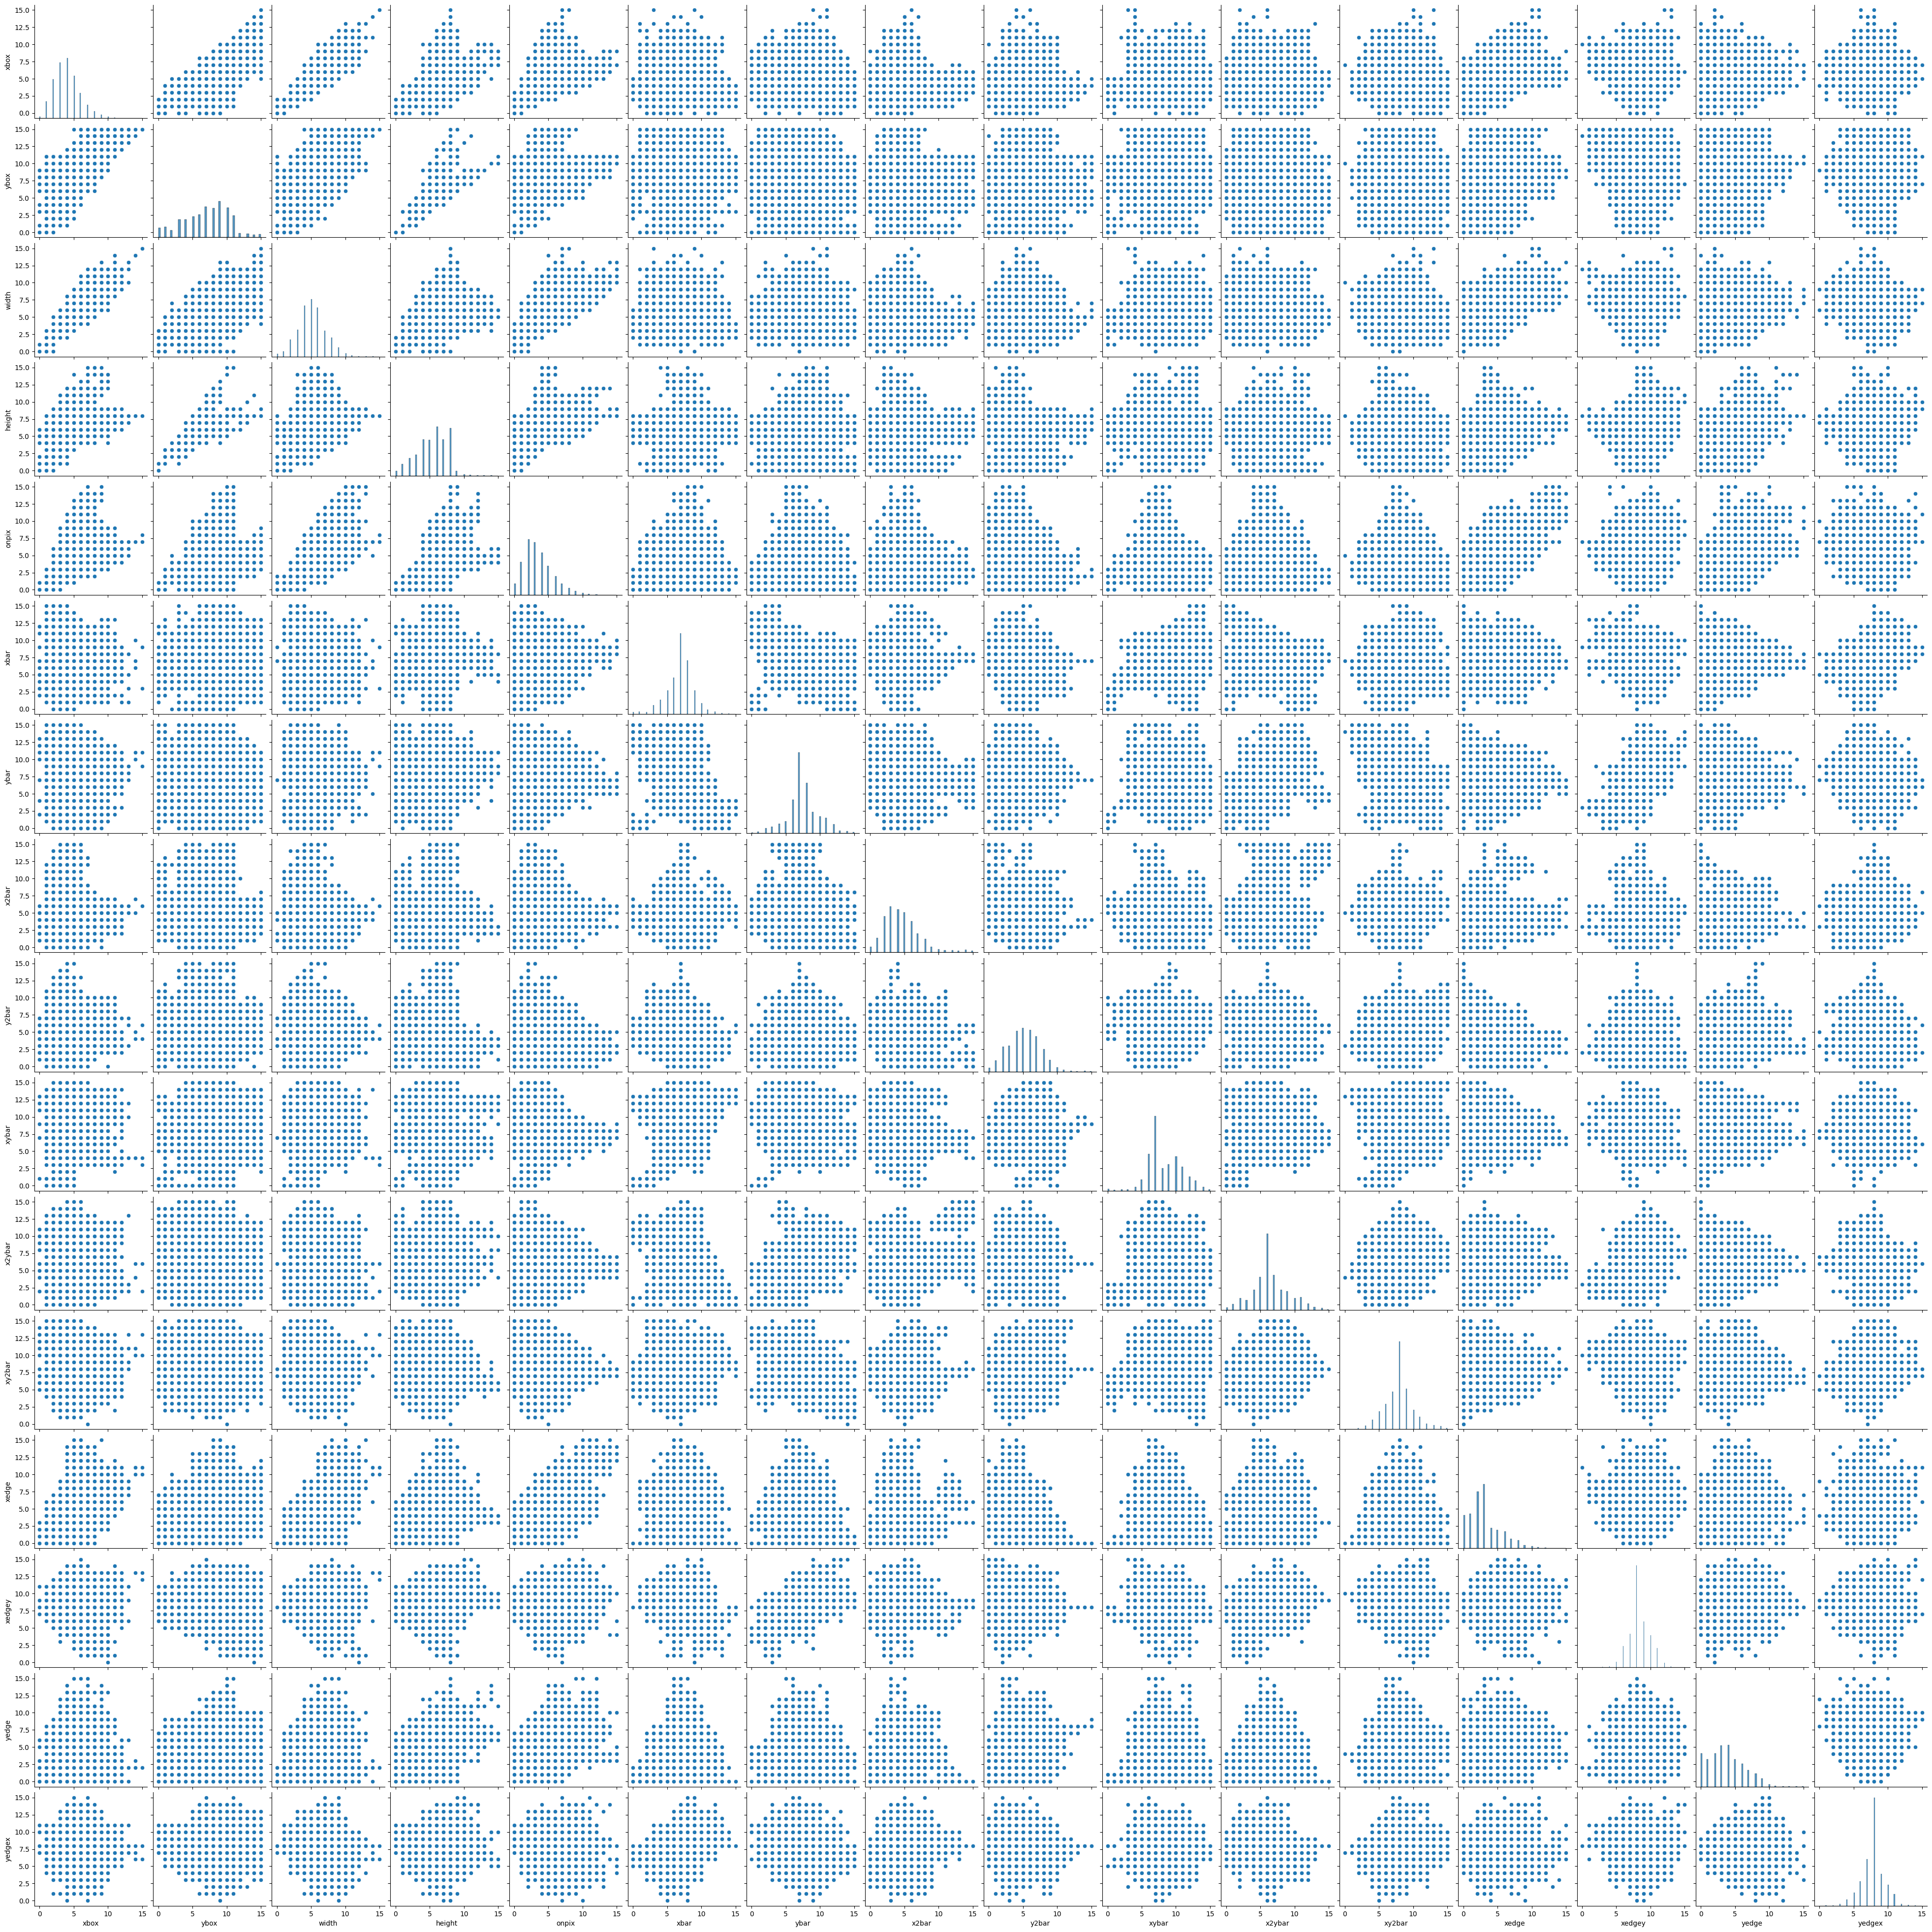

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(Alp)
plt.show()

In [9]:
# prompt: label encoder on size catrgory

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Alp["yedgex"] = label_encoder.fit_transform(Alp["yedgex"])
Alp

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [10]:
Alp.drop(columns=["letter"], axis=1, inplace=True)
Alp

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [11]:
x = Alp.iloc[:,:-1]
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5


In [12]:
y = Alp.iloc[:,-1]
y

0         8
1        10
2         9
3         8
4        10
         ..
19995     7
19996     7
19997     4
19998     8
19999     8
Name: yedgex, Length: 20000, dtype: int64

In [13]:
## create model
model = Sequential()
model.add(Dense(20, input_dim=28, activation='relu'))   ## 1st layer taking activation function is randomly not doing hypertinning
model.add(Dense(10,  activation='relu')) ## 2nd layer ## randomly putting neurons
model.add(Dense(10,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [14]:
## compile model - estabilish connection between input and output layer
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [15]:
model = Sequential()
model.add(Dense(20, input_dim=15, activation='relu'))   ## 1st layer taking activation function is randomly not doing hypertinning
model.add(Dense(10,  activation='relu')) ## 2nd layer ## randomly putting neurons
model.add(Dense(10,  activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [16]:
x = Alp.iloc[:,:15]

In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
## fit the model
history = model.fit(x, y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
1340/1340 [==============================] - 7s 5ms/step - loss: -1892090.8750 - accuracy: 6.7169e-04 - val_loss: -9318478.0000 - val_accuracy: 0.0012
Epoch 2/250
1340/1340 [==============================] - 4s 3ms/step - loss: -47516856.0000 - accuracy: 6.7169e-04 - val_loss: -111659824.0000 - val_accuracy: 0.0012
Epoch 3/250
1340/1340 [==============================] - 4s 3ms/step - loss: -246013472.0000 - accuracy: 6.7169e-04 - val_loss: -426451584.0000 - val_accuracy: 0.0012
Epoch 4/250
1340/1340 [==============================] - 5s 4ms/step - loss: -713840768.0000 - accuracy: 6.7169e-04 - val_loss: -1068320896.0000 - val_accuracy: 0.0012
Epoch 5/250
1340/1340 [==============================] - 4s 3ms/step - loss: -1565806720.0000 - accuracy: 6.7169e-04 - val_loss: -2154873856.0000 - val_accuracy: 0.0012
Epoch 6/250
1340/1340 [==============================] - 5s 4ms/step - loss: -2926997760.0000 - accuracy: 6.7169e-04 - val_loss: -3818763520.0000 - val_accuracy: 0.001

In [19]:
## evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

625/625 [==============================] - 1s 2ms/step - loss: -1950924603916288.0000 - accuracy: 8.5000e-04
accuracy: 0.09%
